In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import glob
from scipy.linalg import norm

from PIL import Image
import io
from urllib import urlopen

## preprocess

- nltkによるストップワード + Illustrationをストップワードにする

## word2vec

参考: https://qiita.com/Hironsan/items/8f7d35f0a36e0f99752c

学習済みモデルの読み込み

In [4]:
import gensim
import logging
import pprint

# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format('./weights/GoogleNews-vectors-negative300.bin', binary=True)

In [5]:
# test
pprint.pprint(model.most_similar(positive=['woman', 'king'], negative=['man']))

[(u'queen', 0.7118192911148071),
 (u'monarch', 0.6189674139022827),
 (u'princess', 0.5902431607246399),
 (u'crown_prince', 0.5499460697174072),
 (u'prince', 0.5377321243286133),
 (u'kings', 0.5236844420433044),
 (u'Queen_Consort', 0.5235945582389832),
 (u'queens', 0.5181134343147278),
 (u'sultan', 0.5098593235015869),
 (u'monarchy', 0.5087411999702454)]


- 文を単語で区切ってベクトルの平均をとって、そのベクトル同士のcos類似度を測る

In [96]:
f = open('./misc/image_data.json', 'r')
json_dict = json.load(f)

In [97]:
stopword = set(['Illustration', 'all', 'just', 'being', 'over', 'both', 'through', 'yourselves', 'its', 'before', 'herself', 'had', 'should', 'to', 'only', 'under', 'ours', 'has', 'do', 'them', 'his', 'very', 'they', 'not', 'during', 'now', 'him', 'nor', 'did', 'this', 'she', 'each', 'further', 'where', 'few', 'because', 'doing', 'some', 'are', 'our', 'ourselves', 'out', 'what', 'for', 'while', 'does', 'above', 'between', 't', 'be', 'we', 'who', 'were', 'here', 'hers', 'by', 'on', 'about', 'of', 'against', 's', 'or', 'own', 'into', 'yourself', 'down', 'your', 'from', 'her', 'their', 'there', 'been', 'whom', 'too', 'themselves', 'was', 'until', 'more', 'himself', 'that', 'but', 'don', 'with', 'than', 'those', 'he', 'me', 'myself', 'these', 'up', 'will', 'below', 'can', 'theirs', 'my', 'and', 'then', 'is', 'am', 'it', 'an', 'as', 'itself', 'at', 'have', 'in', 'any', 'if', 'again', 'no', 'when', 'same', 'how', 'other', 'which', 'you', 'after', 'most', 'such', 'why', 'a', 'off', 'i', 'yours', 'so', 'the', 'having', 'once'])

def title2vec(title_en):
    new_title = []
    for word in title_en.split(" "):
        if not word in stopword:
            new_title.append(word)

    word2vec_avg = []
    for word in new_title:
        try:
            word2vec_avg.append(model.word_vec(word))
        except:
            continue
    word2vec_avg = np.average(word2vec_avg, 0)
    return word2vec_avg

def cos_similarity(a):
    return title2_mat.dot(a) / (norm(title2_mat, axis=1) * norm(a))

def similar_index(a):
    return index_list[cos_similarity(a).argmax()]


In [98]:
index_list = []
title2_mat = []
for i, j in enumerate(json_dict):
    if not title2vec(j["title_en"]).size == 1:   # nanのとき以外
        title2_mat.append(title2vec(j["title_en"]))
        index_list.append(i)
        
title2_mat = np.array(title2_mat)

sentenceに英文を入れるとそれに近いいらすとやの画像を出す

飛行機の機内のイラスト
Illustration of airplane cabin


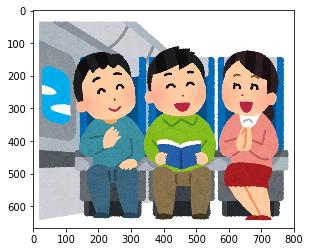

In [101]:
sentence = "airplane"

index = similar_index(title2vec(sentence))

print json_dict[index]["title"]
print json_dict[index]["title_en"]
url = json_dict[index]['image_url']
file =io.BytesIO(urlopen(url).read())
img = Image.open(file)
img = np.array(img)
plt.imshow(img)
plt.show()